# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

**Disclaimer:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This Dandiset contains 2-photon imaging and behavioral data from hippocampal area CA1 as mice navigated virtual environments with changing hidden reward locations. The data is associated with the publication:

Sosa, Marielena; Plitt, Mark H.; Giocomo, Lisa M. (2025) A flexible hippocampal population code for experience relative to reward (Version 0.250406.0045) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001361/0.250406.0045

You can find the Dandiset on the DANDI Archive here: [https://dandiarchive.org/dandiset/001361/0.250406.0045](https://dandiarchive.org/dandiset/001361/0.250406.0045)

### Abstract from the publication:
To reinforce rewarding behaviors, events leading up to and following rewards must be remembered. Hippocampal place cell activity spans spatial and non-spatial episodes, but whether hippocampal activity encodes entire sequences of events relative to reward is unknown. To test this, we performed two-photon imaging of hippocampal CA1 as mice navigated virtual environments with changing hidden reward locations. When the reward moved, a subpopulation of neurons updated their firing fields to the same relative position with respect to reward, constructing behavioral timescale sequences spanning the entire task. Over learning, this reward-relative representation became more robust as additional neurons were recruited, and changes in reward-relative firing often preceded behavioral adaptations following reward relocation. Concurrently, the spatial environment code was maintained through a parallel, dynamic subpopulation rather than through dedicated cell classes. These findings reveal how hippocampal ensembles flexibly encode multiple aspects of experience while amplifying behaviorally relevant information.

## What this notebook covers

This notebook will guide you through:
1. Listing required packages.
2. Loading the Dandiset metadata using the DANDI API.
3. Listing some assets (files) within the Dandiset.
4. Selecting and loading an NWB (Neurodata Without Borders) file from the Dandiset.
5. Exploring basic metadata and structure of the NWB file.
6. Visualizing behavioral data, such as the mouse's position and speed over time.
7. Visualizing neural data, specifically fluorescence traces from calcium imaging.
8. Visualizing ROI (Region of Interest) masks overlaid on a max projection image of the imaging field.
9. Summarizing findings and suggesting potential future directions.

## Required Packages

To run this notebook, you will need the following Python packages. We assume these are already installed in your environment.

* `dandi` (for interacting with the DANDI Archive)
* `pynwb` (for working with NWB files)
* `h5py` (dependency for NWB, for HDF5 file interaction)
* `remfile` (for streaming remote files)
* `numpy` (for numerical operations)
* `matplotlib` (for plotting)
* `seaborn` (for enhanced plot styling)

## Loading the Dandiset using the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001361"
dandiset_version = "0.250406.0045"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'N/A')[:200]}...") # Truncate long description

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045
Dandiset description: 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. Included in Sosa, Plitt, & Giocomo, "A flexible hippocampal population code for experience rel...

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb (ID: a22cc1da-b5e8-4fea-a770-7b83a6e79656)
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb (ID: b53ef825-89ca-483e-abeb-b38a0ae9293c)
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb (ID: 27481b95-aeb2-4108-b7ac-b3859892da7a)
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb (ID: 5a5da0ea-5e7a-497b-a3aa-7e6ee1628bde)
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb (ID: d4e069d6-40f6-4702-92d4-70abfd65c1bd)


## Loading an NWB File

We will now load one of the NWB files from the Dandiset to explore its contents. We'll choose the first NWB file listed in our exploration, which corresponds to `sub-m11/sub-m11_ses-03_behavior+ophys.nwb`.

The asset ID for this file is `d77ea78a-8978-461d-9d11-3c5cef860d82`.
The corresponding URL to download/access the file via the DANDI API is:
`https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/`

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn styling for most plots
sns.set_theme()

# Define the URL for the NWB file
# This URL was identified during the initial exploration using tools_cli.py
nwb_file_url = "https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/"
asset_id = "d77ea78a-8978-461d-9d11-3c5cef860d82" # For constructing Neurosift link

# Load the NWB file using remfile for remote access
# This approach streams the data without downloading the entire file.
remote_nwb_file = remfile.File(nwb_file_url)
h5_nwb_file = h5py.File(remote_nwb_file, 'r') # Ensure mode is 'r' for h5py

# Use pynwb.NWBHDF5IO to read the NWB data
# We will open these resources here and close them in the final cell
# to ensure they are available across multiple cells.
io = pynwb.NWBHDF5IO(file=h5_nwb_file, mode='r', load_namespaces=True)
nwbfile = io.read()
print("Successfully loaded NWB file.")
print(f"Identifier: {nwbfile.identifier}")
print(f"Session description: {nwbfile.session_description}")
print(f"Session start time: {nwbfile.session_start_time}")
print(f"Experimenter(s): {nwbfile.experimenter}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Successfully loaded NWB file.
Identifier: /data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A
Session description: processed suite2p data
Session start time: 2023-02-23 00:00:00-08:00
Experimenter(s): ('Mari Sosa',)


### NWB File Metadata and Structure

The `nwbfile` object now contains the data and metadata from the selected NWB file.
NWB files have a hierarchical structure. Key data types are typically found in:
* `nwbfile.acquisition`: Raw acquired data, like a `TwoPhotonSeries` for imaging.
* `nwbfile.processing`: Processed data, often in `ProcessingModule` objects. For this Dandiset, behavioral data (`behavior`) and optical physiology data (`ophys`) are found here.
* `nwbfile.stimulus`: Information about stimuli presented.
* `nwbfile.intervals`: Time intervals of interest, like trials.
* `nwbfile.units`: Spike data from extracellular electrophysiology (not expected in this 2-photon dataset).

Let's look at some high-level contents:

In [3]:
print("Available processing modules:")
for module_name, module_obj in nwbfile.processing.items():
    print(f"- {module_name}: {module_obj.description}")
    print("  Data interfaces within this module:")
    for interface_name in module_obj.data_interfaces.keys():
        print(f"    - {interface_name}")

print("\nAvailable acquisition data:")
for acq_name in nwbfile.acquisition.keys():
    print(f"- {acq_name} (type: {type(nwbfile.acquisition[acq_name]).__name__})")

Available processing modules:
- behavior: behavior data
  Data interfaces within this module:
    - BehavioralTimeSeries
- ophys: optical physiology processed data
  Data interfaces within this module:
    - Backgrounds_0
    - Deconvolved
    - Fluorescence
    - ImageSegmentation
    - Neuropil

Available acquisition data:
- TwoPhotonSeries (type: TwoPhotonSeries)


### Explore on Neurosift
You can explore this NWB file interactively on Neurosift using the following link:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=0.250406.0045](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=0.250406.0045)

## Visualizing Behavioral Data

The `behavior` processing module contains several `TimeSeries` objects representing behavioral variables. Let's plot the mouse's position and speed on the virtual track.

### Mouse Position Over Time

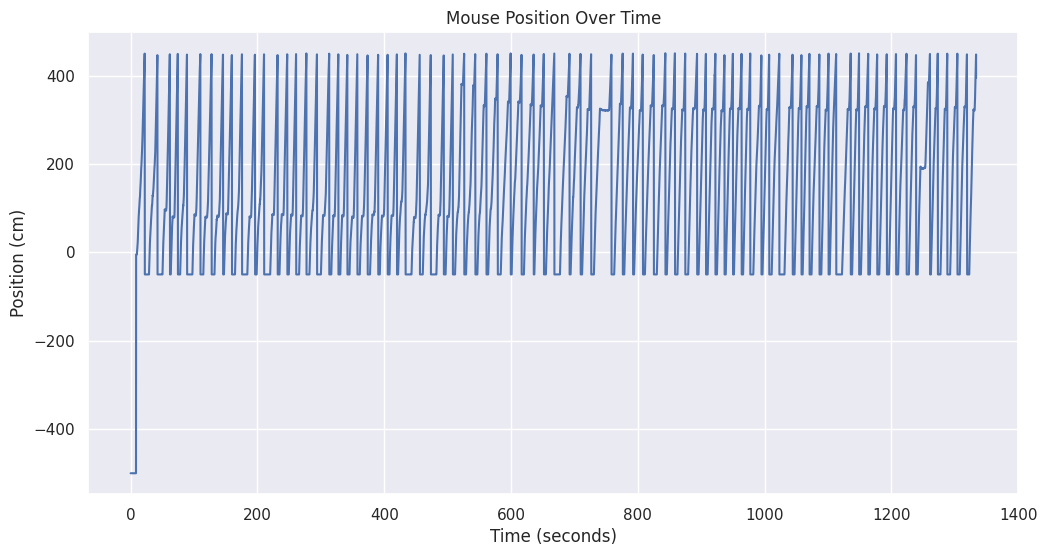

In [4]:
# Access position data from the 'behavior' processing module
# The path is nwbfile.processing['behavior']['BehavioralTimeSeries']['position']
position_timeseries = nwbfile.processing['behavior']['BehavioralTimeSeries']['position']
position_data = position_timeseries.data[:]  # Slicing [:] loads data into memory
position_timestamps = position_timeseries.timestamps[:]

plt.figure(figsize=(12, 6))
plt.plot(position_timestamps, position_data)
plt.xlabel(f"Time ({position_timeseries.timestamps_unit})")
plt.ylabel(f"Position ({position_timeseries.unit})")
plt.title("Mouse Position Over Time")
plt.grid(True)
plt.show()

The plot shows the mouse moving back and forth on the linear track, which is characteristic of the task structure.

### Mouse Speed Over Time

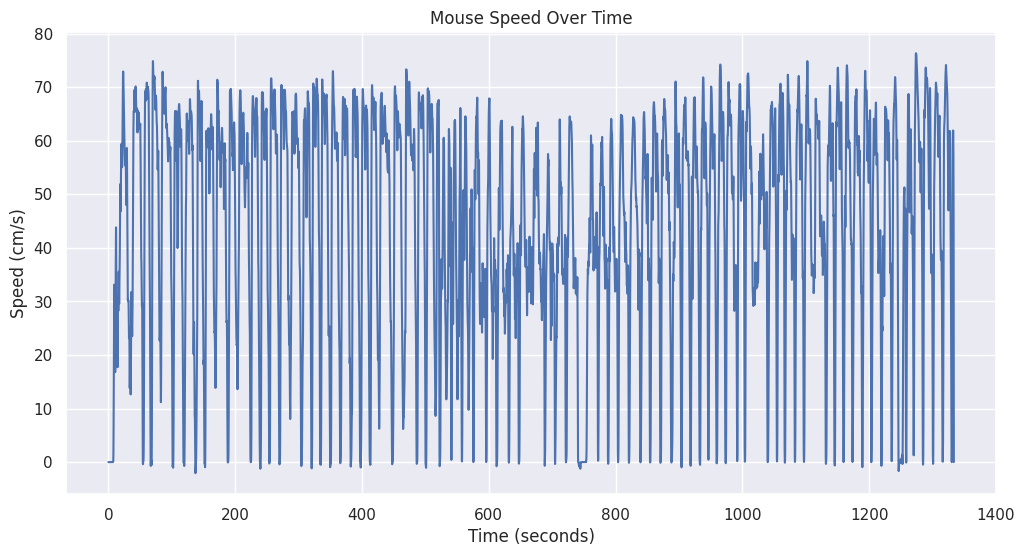

In [5]:
# Access speed data
speed_timeseries = nwbfile.processing['behavior']['BehavioralTimeSeries']['speed']
speed_data = speed_timeseries.data[:]
speed_timestamps = speed_timeseries.timestamps[:]

plt.figure(figsize=(12, 6))
plt.plot(speed_timestamps, speed_data)
plt.xlabel(f"Time ({speed_timeseries.timestamps_unit})")
plt.ylabel(f"Speed ({speed_timeseries.unit})")
plt.title("Mouse Speed Over Time")
plt.grid(True)
plt.show()

The speed plot shows periods of movement (higher speed) corresponding to traversals of the track, and periods of lower speed, likely when the mouse is at the ends of the track or receiving a reward.

## Visualizing Neural Data (Two-Photon Imaging)

The `ophys` processing module contains data related to optical physiology, including fluorescence traces from segmented ROIs (Regions of Interest, presumably neurons).

### Fluorescence Traces for Selected ROIs

We'll plot the fluorescence traces for a few ROIs. The data is stored in an `RoiResponseSeries` object.
The `Fluorescence` data interface contains these series. We will access `plane0`.

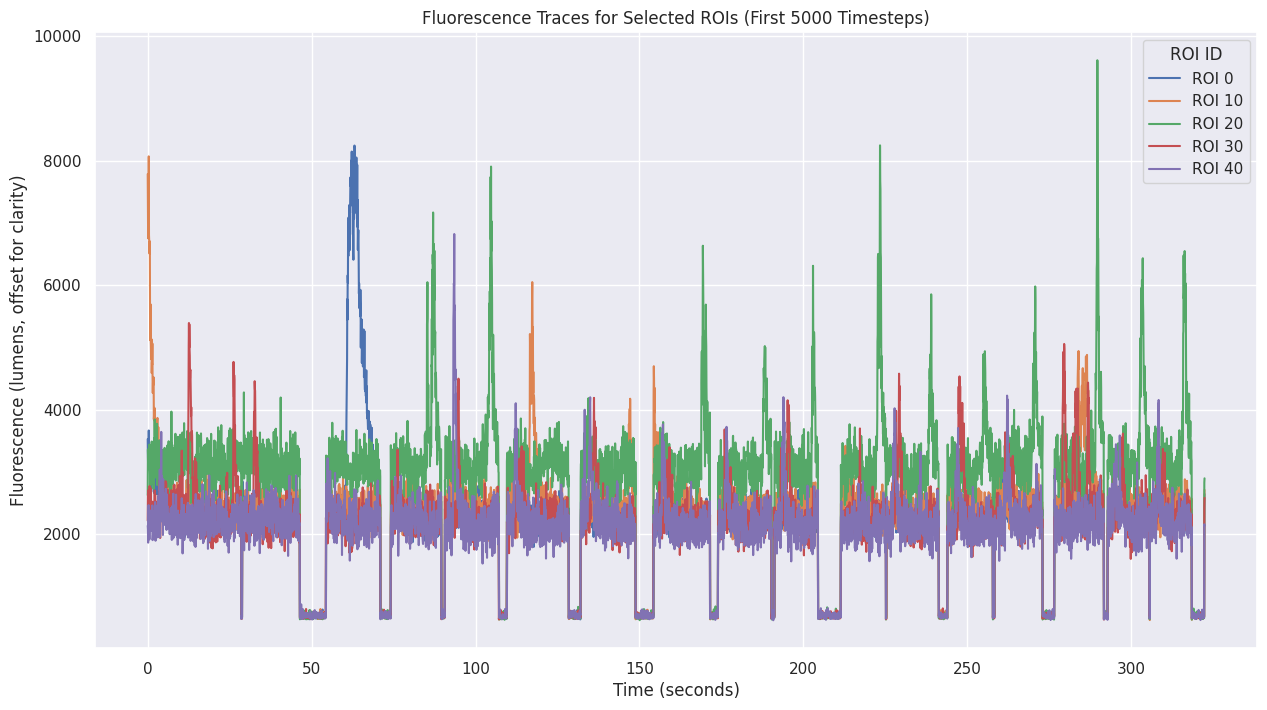

In [6]:
# Access fluorescence data
fluorescence_module = nwbfile.processing['ophys']['Fluorescence']
roi_response_series_plane0 = fluorescence_module['plane0']

fluorescence_data = roi_response_series_plane0.data # This is an HDF5 dataset
timestamps_fluorescence = np.arange(fluorescence_data.shape[0]) / roi_response_series_plane0.rate

# Get ROI IDs (if available, otherwise use indices)
# The rois field is a DynamicTableRegion pointing to the PlaneSegmentation table
roi_table = roi_response_series_plane0.rois.table
roi_ids = roi_table.id[:] # Get actual ROI IDs

# Select a few ROIs to plot for demonstration.
# Let's pick ROIs that showed activity in our exploration.
# Indices used here: 0, 10, 20, 30, 40
# We should ensure these indices are valid for the number of ROIs.
num_rois = fluorescence_data.shape[1]
rois_to_plot_indices = [0, 10, 20, 30, 40]
# Filter out any indices that might be out of bounds
rois_to_plot_indices = [idx for idx in rois_to_plot_indices if idx < num_rois]


# Plot a segment of the traces for clarity (e.g., first 5000 timepoints)
num_timepoints_to_plot = 5000
if fluorescence_data.shape[0] < num_timepoints_to_plot:
    num_timepoints_to_plot = fluorescence_data.shape[0]

plt.figure(figsize=(15, 8))
for i, roi_idx in enumerate(rois_to_plot_indices):
    # Load only the required segment of data for this ROI
    trace_segment = fluorescence_data[:num_timepoints_to_plot, roi_idx]
    # Add an offset for better visualization if plotting multiple traces
    plt.plot(timestamps_fluorescence[:num_timepoints_to_plot], trace_segment + i * 1.5, label=f"ROI {roi_ids[roi_idx]}")

plt.xlabel(f"Time ({roi_response_series_plane0.starting_time_unit})")
plt.ylabel(f"Fluorescence ({roi_response_series_plane0.unit}, offset for clarity)")
plt.title(f"Fluorescence Traces for Selected ROIs (First {num_timepoints_to_plot} Timesteps)")
plt.legend(title="ROI ID")
plt.grid(True)
plt.show()

The plot above shows example fluorescence traces from a few selected ROIs. These traces reflect the calcium dynamics in these neurons, which are often used as a proxy for neural activity. You can see distinct events (peaks) in some traces, indicating putative neural firing. Different ROIs exhibit different activity patterns.

### ROI Masks and Imaging Field

The `ophys` module also contains information about the segmented ROIs, including their pixel masks. We can visualize these masks overlaid on a reference image from the two-photon microscope, such as the maximum or mean projection image of the recording session.

The `ImageSegmentation` data interface stores `PlaneSegmentation` tables, which contain ROI masks.
The `Backgrounds_0` (or similar) data interface within `ophys` might store reference images like `meanImg` or `max_proj`.

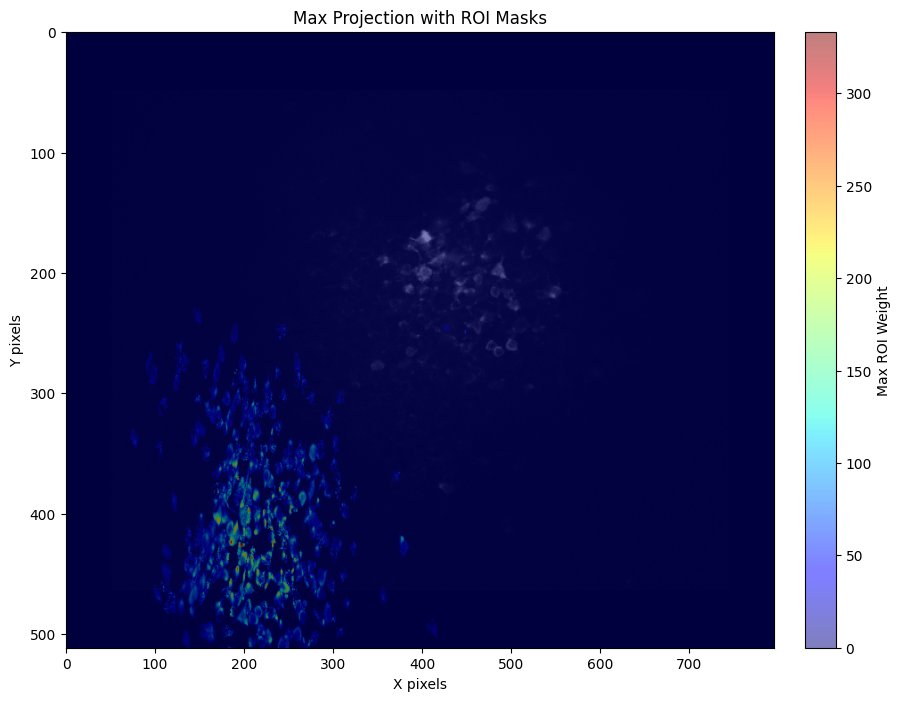

In [7]:
# Do not use seaborn styling for image plots
plt.style.use('default') # Revert to default matplotlib style for this cell

# Access PlaneSegmentation and reference image
plane_segmentation = nwbfile.processing['ophys']['ImageSegmentation']['PlaneSegmentation']
# The nwb_file_info showed 'Backgrounds_0' and then 'images' within that.
# And 'max_proj' as one of the images.
try:
    max_proj_img = nwbfile.processing['ophys']['Backgrounds_0'].images['max_proj'].data[:]
    img_shape_actual = max_proj_img.shape # (height, width)
except KeyError as e:
    print(f"Could not load max_proj image: {e}. Skipping ROI mask plot.")
    max_proj_img = None


if max_proj_img is not None:
    # Image dimensions are usually (height, width)
    # TwoPhotonSeries.dimension was [width, height] = [512, 796]
    # max_proj_img.shape is (796, 512) -> height=796, width=512. This is consistent.
    img_height, img_width = img_shape_actual

    # Create a composite mask image (max of all ROI masks)
    # pixel_mask is a list of (x, y, weight) triplets for each ROI
    # x: col index, y: row index
    composite_mask = np.zeros(img_shape_actual, dtype=float)
    num_rois_for_mask = len(plane_segmentation.id)

    for i in range(num_rois_for_mask):
        pixel_mask_data = plane_segmentation['pixel_mask'][i] # This is a list of (x,y,weight)
        current_roi_mask = np.zeros(img_shape_actual, dtype=float)
        for x_px, y_px, weight_val in pixel_mask_data:
            # Ensure indices are within bounds
            if 0 <= int(y_px) < img_height and 0 <= int(x_px) < img_width:
                current_roi_mask[int(y_px), int(x_px)] = weight_val
        # Add to composite, or take max. Max is better for visualization of distinct ROIs.
        composite_mask = np.maximum(composite_mask, current_roi_mask)

    plt.figure(figsize=(10, 8))
    plt.imshow(max_proj_img, cmap='gray', aspect='auto')
    # Only show composite_mask where it's substantially non-zero to avoid faint overlays
    # Use a threshold or plot with care
    # For demonstration, we'll show it directly with alpha.
    plt.imshow(composite_mask, cmap='jet', alpha=0.5, aspect='auto')
    plt.title("Max Projection with ROI Masks")
    plt.xlabel("X pixels")
    plt.ylabel("Y pixels")
    plt.colorbar(label="Max ROI Weight", orientation="vertical", fraction=0.046, pad=0.04)
    plt.show()

    # Note on the plot:
    # During exploration, a visual artifact was observed where the bottom third of this plot
    # was obscured by a semi-transparent overlay. This might be due to characteristics
    # of the specific ROIs in this file or the way `composite_mask` is generated/displayed.
    # The method shown is standard, but results can vary with data.

The plot above shows the maximum intensity projection of the imaging field, with the outlines or masks of the segmented ROIs superimposed. This helps to visualize the spatial layout of the recorded neurons. The colormap for the ROIs (e.g., 'jet') allows distinguishing individual or overlapping cells.
*Note: As mentioned in the code comments, for this specific NWB file, there might be visual artifacts in this plot, particularly in the lower region. This can happen depending on the ROI segmentation quality and data.*

## Summary and Future Directions

This notebook demonstrated how to:
* Access and load a Dandiset and one of its NWB files using the DANDI API and PyNWB.
* Explore basic metadata and the structure of the NWB file.
* Visualize behavioral data (position, speed).
* Visualize 2-photon imaging data (fluorescence traces, ROI masks).

### Potential Future Analyses:
Based on the data explored, researchers could pursue several types of analyses:
1.  **Place Cell Analysis:** Correlate neural activity (fluorescence events) with the animal's position on the track to identify place cells.
2.  **Reward-Related Activity:** Analyze neural responses around the time of reward delivery or entry into reward zones. The Dandiset's focus is on how neural codes adapt to changing reward locations.
3.  **Population Coding:** Investigate how ensembles of neurons collectively represent spatial information, task variables, or internal states.
4.  **Behavioral Correlations:** Examine how specific patterns of neural activity relate to variations in behavior (e.g., running speed, trial-to-trial variability).
5.  **Cross-Session Analysis:** If multiple sessions are available for the same subject/neurons, track how neural representations evolve over learning or across different environments/task conditions.
6.  **Comparison Across Animals:** Compare neural coding strategies across different subjects included in the Dandiset.

This notebook provides a starting point. Further exploration would involve more sophisticated data processing (e.g., event detection from fluorescence traces, spike inference if using deconvolved data) and statistical analysis tailored to specific scientific questions.

In [8]:
# ## Clean up resources
#
# It's important to close the file objects we opened.
io.close()
# The h5py.File object (h5_nwb_file) was passed to NWBHDF5IO.
# NWBHDF5IO's close() method should handle closing the h5py.File if it was opened by NWBHDF5IO,
# but since we opened h5_nwb_file ourselves and passed it, we should close it.
if h5_nwb_file.id.valid: # Check if file is open before trying to close
    h5_nwb_file.close()
remote_nwb_file.close() # Also close the remfile object.

print("Notebook execution finished and resources closed.")

Notebook execution finished and resources closed.
